### Project: Investigate a Dataset

# Analysis of Titanic Data

## Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

This project is an analysis of the given titanic dataset which contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.  

## Question Phase

These are the questions that I wish to answer using the data:

1. What is the percentage of people who survived?
2. What is the percentage of male and female passengers?
3. What is the percentage of passengers in each class?
4. What is the percentage of men and women travelling from different classes?
5. What is the percentage of passengers travelling with different numbers of siblings/spouse?
6. What is the percentage of passengers travelling with different numbers of parents/children?
7. What is the percentage of passengers travelling with different numbers of relatives?
8. What is the number of people travelling with relatives from different classes?
9. What is the percentage of people who boarded at different ports?
10. What is the port of embarkation of people belonging to different classes?
11. How does fare vary with variables like gender, class and port of embarkation?
12. Who are the people who travelled free of charge? Which class do they belong to? What is their port of embarkation? What were their chances of survival? How many men and women? Did they have relatives aboard or they travelled alone?
13. What factors made people more likely to survive?
Survival chances based on:
  a.	Fare
  b.	Gender
  c.	Class
  d.	Number of siblings and spouse onboard
  e.	Number of parents and children onboard
  f.	Number of relatives
  g.	Age group
14. What is the percentage of people belonging to different age groups?
15. What is the average age of males and females?
16. What is the average number of relatives who travelled with people of different age groups?
17. Comparison of average number of parents/children and siblings/spouse who travelled with people of different age groups.
18. What is the mean fare paid by people belonging to different age groups?
19. What is the average age of people from different classes?	
20. What is the number of people of different age groups in different classes?
21. What is the average fare based on age group and class?


### Acquiring data

In [1]:
import unicodecsv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

passengers = pd.read_csv('titanic-data.csv')

display(passengers.head(10))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From the above table, we observe that the entries in the ticket column is a combination of letters, symbols and numbers which are not consistent through out the column. We also notice that there are missing entries in age and cabin columns. Now, to check if the other columns have all entries filled:

In [2]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We find that apart from age and cabin columns, the embarked column also has missing values.

In [3]:
print(passengers.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### To check for number of missing data in each column:

In [4]:
titanic_missing_data_stats = passengers.isnull().sum().to_frame()
print(titanic_missing_data_stats)        

               0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2


It shows that 687 entries are missing from the cabin column out of the total 891 entries that is, 77.1% of values are missing. So, it is better to ignore this column from the analysis. Due to the inconsistent nature of the values in the ticket column, it is also excluded from the analysis.

In [5]:
passengers = passengers.drop(['Ticket','Cabin'], axis=1)
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


 ### Creating more descriptive labels

Inorder to create interpretable visualizations later on, let us now create some extra columns with more descriptive labels for 'Survived', 'Pclass' and 'Embarked' columns.

In [6]:
# Create Survival Label Column
passengers['Survival'] = passengers.Survived.map({0 : 'Died', 1 : 'Survived'})
passengers.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: object

In [7]:
# Create Pclass Label Column
passengers['Class'] = passengers.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
passengers.Class.head()

0    Third Class
1    First Class
2    Third Class
3    First Class
4    Third Class
Name: Class, dtype: object

In [8]:
# Create Embarked Labels Column
passengers['Ports'] = passengers.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})
passengers.Ports.head()

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: Ports, dtype: object

In [9]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survival,Class,Ports
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Died,Third Class,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Survived,First Class,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Survived,Third Class,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Survived,First Class,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Died,Third Class,Southampton


### Percentage of people who survived

Died        61.616162
Survived    38.383838
Name: Survival, dtype: float64


(-1.1124144256788431,
 1.1054514992928401,
 -1.1145417767534422,
 1.1193396499639321)

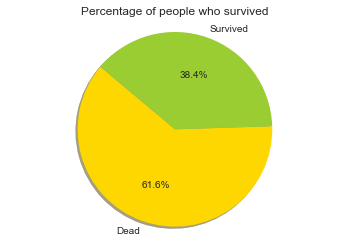

In [10]:
survival_percentage = ((passengers['Survival'].value_counts()/891)*100)  
print(survival_percentage)
labels = ['Dead','Survived']
colors = ['gold','yellowgreen']
plt.pie(survival_percentage,labels = labels, colors = colors, 
        autopct='%1.1f%%', shadow='True', startangle = 140)
plt.title("Percentage of people who survived")
plt.axis('equal')

The percentage of people who survived is only 38.4%.

### Percentage of male and female passengers

male      64.758698
female    35.241302
Name: Sex, dtype: float64


(-1.1155437211698283,
 1.1139134931398533,
 -1.1136375184948133,
 1.117179781741608)

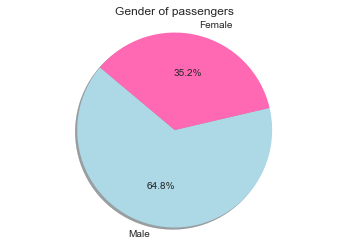

In [11]:
gender_percentage = ((passengers['Sex'].value_counts()/891)*100)
print(gender_percentage)
labels = ['Male','Female']
colors = ['lightblue','hotpink']
plt.pie(gender_percentage, colors = colors, labels=labels,
        autopct='%1.1f%%', shadow='True', startangle = 140)
plt.title("Gender of passengers")
plt.axis('equal')

About 65% of the passengers were males and the remaining 35% were females.

### Percentage of passengers in each class

Third Class     55.106622
First Class     24.242424
Second Class    20.650954
Name: Class, dtype: float64


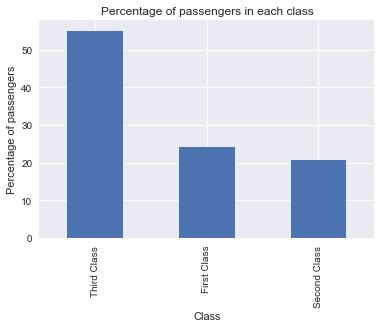

In [12]:
class_percentage = ((passengers['Class'].value_counts()/891)*100)
class_percentage.plot(kind='bar')
plt.title("Percentage of passengers in each class")
plt.ylabel("Percentage of passengers")
plt.xlabel("Class")
print (class_percentage)

More than 50% of the number of total passengers are from 3rd class. About 24% of the passengers are from 1st class and only around 21% are from 2nd class.

### Percentage of passengers by sex and class

Sex              female       male
Class                             
First Class   10.549944  13.692480
Second Class   8.529742  12.121212
Third Class   16.161616  38.945006


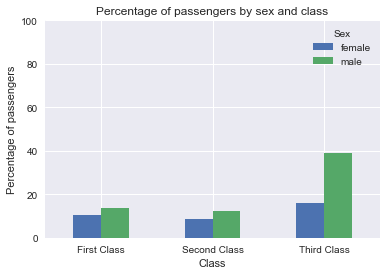

In [13]:
gender_class_percentage=pd.crosstab(passengers['Class'],passengers['Sex'],normalize=True)*100
ax=gender_class_percentage.plot.bar()
ax.set(title='Percentage of passengers by sex and class',
       xlabel='Class',
       ylabel='Percentage of passengers',
       ylim=[0,100])
ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=0);
print(gender_class_percentage)

We see that, both percentage of males and females in third class is higher than than those of first and second classes. The percentage of females in third class is double that of second class and only slightly higher than that of 1st class. But, the percentage of males in 3rd class is almost thrice that of 1st and 2nd class. The difference between the percentage of males and females is much higher in 3rd class compared to the other 2 classes. We also notice that the percentage of males is higher than the percentage of females in all three classes.

### Percentage of passengers travelling with different number of siblings/spouse

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


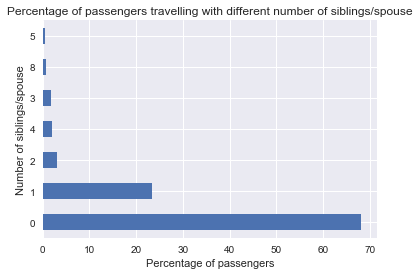

In [14]:
sibsp_percentage = (passengers['SibSp'].value_counts()/891)*100
print(sibsp_percentage)
sibsp_percentage.plot(kind='barh')
plt.title("Percentage of passengers travelling with different number of siblings/spouse")
plt.xlabel("Percentage of passengers")
plt.ylabel("Number of siblings/spouse")

We can see that about 32% of the people travelled with siblings/spouse and 23% of the people travelled with only 1 sibling/spouse.

### Percentage of passengers travelling with different number of parents/children

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


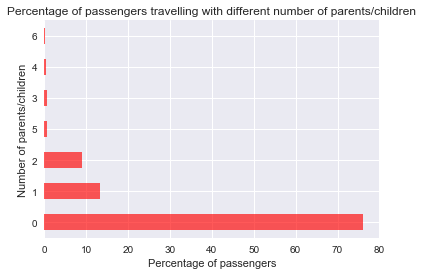

In [15]:
parch_percentage = (passengers['Parch'].value_counts()/891)*100
print(parch_percentage)
parch_percentage.plot(kind='barh', color="red", alpha=.65)
plt.title("Percentage of passengers travelling with different number of parents/children")
plt.xlabel("Percentage of passengers")
plt.ylabel("Number of parents/children")

Only 24% of the people travelled with parents/children and 13% of the people travelled with only 1 parent/child.

On comparison of the above 2 graphs we find that, the percentage of passengers who travelled with siblings/spouse is 8% higher than those who travelled with parents/children.

### Percentage of passengers travelling with different number of relatives

Let us insert an extra column to store the number of relatives travelling with each passenger.

In [16]:
passengers['Relatives'] = passengers['SibSp'] + passengers['Parch']
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survival,Class,Ports,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Died,Third Class,Southampton,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Survived,First Class,Cherbourg,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Survived,Third Class,Southampton,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Survived,First Class,Southampton,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Died,Third Class,Southampton,0


0     60.269360
1     18.069585
2     11.447811
3      3.254770
5      2.469136
4      1.683502
6      1.346801
10     0.785634
7      0.673401
Name: Relatives, dtype: float64


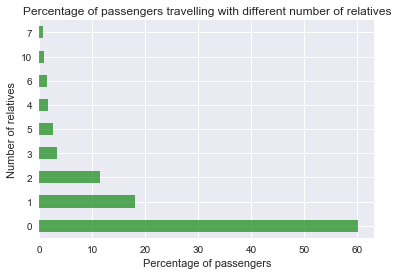

In [17]:
#Calculating percentage of passengers travelling with different number of relatives
relatives_percentage = (passengers['Relatives'].value_counts()/891)*100
print(relatives_percentage)
relatives_percentage.plot(kind='barh',color="green", alpha=.65)
plt.title("Percentage of passengers travelling with different number of relatives")
plt.xlabel("Percentage of passengers")
plt.ylabel("Number of relatives")

We see that 60% of the people travelled alone while around 40% of the people travelled with relatives. We further notice that about 90% of people travelled with at most 2 relatives.

###  Number of people travelling with relatives from different classes

In [18]:
#Number of first class passengers
relative_class_1=passengers.loc[passengers['Pclass'] == 1]
len(relative_class_1)

216

In [19]:
#Number of second class passengers
relative_class_2=passengers.loc[passengers['Pclass'] == 2]
len(relative_class_2)

184

In [20]:
#Number of third class passengers
relative_class_3=passengers.loc[passengers['Pclass'] == 3]
len(relative_class_3)

491

In [21]:
#percentage of people from first class travelling with different number of relatives
(((relative_class_1.groupby(['Relatives']).size())/216)*100)

Relatives
0    50.462963
1    32.407407
2    11.111111
3     3.240741
4     0.925926
5     1.851852
dtype: float64

In [22]:
#percentage of people from second class travelling with different number of relatives
(((relative_class_2.groupby(['Relatives']).size())/184)*100)

Relatives
0    56.521739
1    18.478261
2    16.847826
3     7.065217
4     0.543478
5     0.543478
dtype: float64

In [23]:
#percentage of people from third class travelling with different number of relatives
(((relative_class_3.groupby(['Relatives']).size())/491)*100)

Relatives
0     65.987780
1     11.608961
2      9.572301
3      1.832994
4      2.443992
5      3.462322
6      2.443992
7      1.221996
10     1.425662
dtype: float64

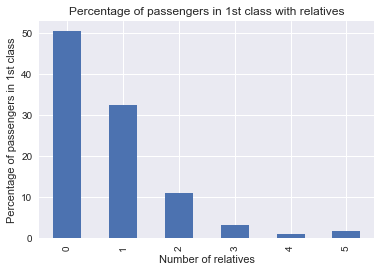

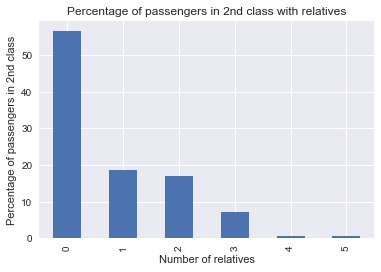

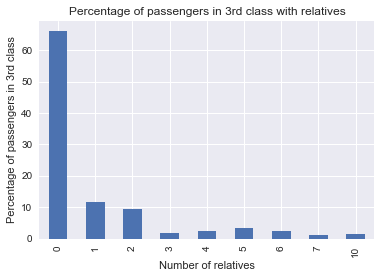

In [24]:
(((relative_class_1.groupby(['Relatives']).size())/216)*100).plot(kind='bar')
plt.title("Percentage of passengers in 1st class with relatives")
plt.ylabel("Percentage of passengers in 1st class")
plt.xlabel("Number of relatives")
plt.show()

(((relative_class_2.groupby(['Relatives']).size())/184)*100).plot(kind='bar')
plt.title("Percentage of passengers in 2nd class with relatives")
plt.ylabel("Percentage of passengers in 2nd class")
plt.xlabel("Number of relatives")
plt.show()

(((relative_class_3.groupby(['Relatives']).size())/491)*100).plot(kind='bar')
plt.title("Percentage of passengers in 3rd class with relatives")
plt.ylabel("Percentage of passengers in 3rd class")
plt.xlabel("Number of relatives")
plt.show()

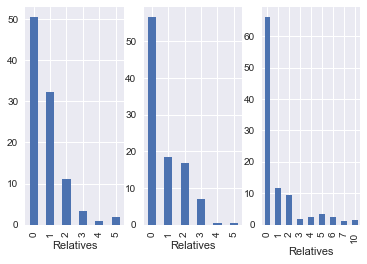

In [36]:
p1= (((relative_class_1.groupby(['Relatives']).size())/216)*100)

p2= (((relative_class_2.groupby(['Relatives']).size())/184)*100)

p3= (((relative_class_3.groupby(['Relatives']).size())/491)*100)

from matplotlib import pyplot


pyplot.figure()

# sp1
pyplot.subplot(131) # row, column, plot
p1.plot(kind='bar')

# sp2
pyplot.subplot(132) # row column, plot
p2.plot(kind='bar')

# sp3
pyplot.subplot(133) # row column, plot
p3.plot(kind='bar')

pyplot.show()

We see that the maximum number of relatives per person is 5 in 1st and 2nd class and it is 10 in 3rd class.

In 1st class the percentage of people travelling with relatives is almost equal to the number of people who don't. But in 2nd and 3rd classes, the number of people travelling alone is higher compared to people travelling with relatives. The difference is especially greater in 3rd class. 

In first class, about 83% of the people travel with at most 1 relative.

### Finding missing entries in Embarked column

In [30]:
print(passengers[passengers.Ports.isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Fare Embarked  Survival        Class Ports  \
61   female  38.0      0      0  80.0      NaN  Survived  First Class   NaN   
829  female  62.0      0      0  80.0      NaN  Survived  First Class   NaN   

     Relatives  
61           0  
829          0  


### Removing missing entries in Embarked column 

Let us create a new dataframe with 4 columns Pclass, Embarked, Fare and Sex and then remove the missing entries. 

In [31]:
#create new dataframe
passenger_class_embarked_Fare = passengers[['Pclass','Ports','Fare','Sex','Class']]
passenger_class_embarked_Fare.head()

,Pclass,Ports,Fare,Sex,Class
0,3,Southampton,7.2500,male,Third Class
1,1,Cherbourg,71.2833,female,First Class
2,3,Southampton,7.9250,female,Third Class
3,1,Southampton,53.1000,female,First Class
4,3,Southampton,8.0500,male,Third Class


In [32]:
#missing entries in new dataframe
print(passenger_class_embarked_Fare[passenger_class_embarked_Fare.Ports.isnull()])

     Pclass Ports  Fare     Sex        Class
61        1   NaN  80.0  female  First Class
829       1   NaN  80.0  female  First Class


In [33]:
#Remove the missing values from new data frame
passenger_class_embarked_Fare_clean = passenger_class_embarked_Fare.dropna()

#To check if values are removed
print(len(passenger_class_embarked_Fare_clean))
print(passenger_class_embarked_Fare_clean[passenger_class_embarked_Fare_clean.Ports.isnull()])

889
Empty DataFrame
Columns: [Pclass, Ports, Fare, Sex, Class]
Index: []


### Percentage of people who boarded at different ports

It is to be noted that in all calculations involving the port of embarkation as a parameter, the 2 missing entries are not taken into consideration due to the unavailability of data.

Southampton    72.440945
Cherbourg      18.897638
Queenstown      8.661417
Name: Ports, dtype: float64


(-1.1179254325167649,
 1.1186609606680391,
 -1.1022168992622188,
 1.1182129812566628)

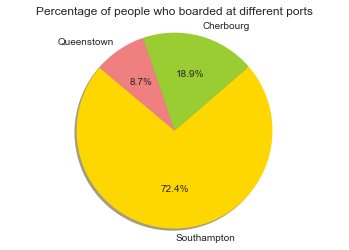

In [34]:
embarkation_percentage = (passenger_class_embarked_Fare_clean['Ports'].value_counts()/889)*100
print(embarkation_percentage)

colors = ['gold','yellowgreen','lightcoral']
labels = ['Southampton','Cherbourg','Queenstown']
plt.pie(embarkation_percentage, labels=labels, colors = colors, 
        autopct='%1.1f%%', shadow='True', startangle = 140)
plt.title("Percentage of people who boarded at different ports")
plt.axis('equal')

More than 70% of the passengers have boarded at the Southampton port, around 19% of the passengers have boarded at the Cherbourg port and less than 10% have boarded at the Queenstown port.

### Port of embarkation of people belonging to different classes

Ports         Cherbourg  Queenstown  Southampton
Class                                           
First Class          85           2          127
Second Class         17           3          164
Third Class          66          72          353


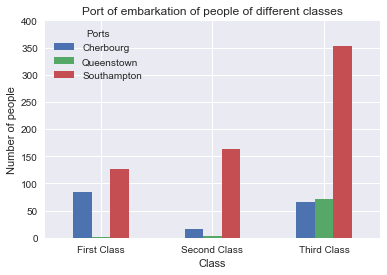

In [128]:
embarked_class=pd.crosstab(passenger_class_embarked_Fare_clean['Class'],passenger_class_embarked_Fare_clean['Ports'])
ax=embarked_class.plot.bar()
ax.set(title='Port of embarkation of people of different classes',
       xlabel='Class',
       ylabel='Number of people',
       ylim=[0,400])
ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=0);
print(embarked_class)

The Southampton port is undoubtedly the most popular port among all 3 classes.

It looks like Cherbourg port is more popular than Queenstown port among the first and second classes. But among the third class, the number of people who boarded from the Queenstown port is higher than those who boarded from Cherbourg port.

We can also see that the Cherbourg port is more popular among the first class than the second class.

Queenstown port is more popular among 3rd class than 1st and 2nd classes.

### FARE

### Fare based on gender

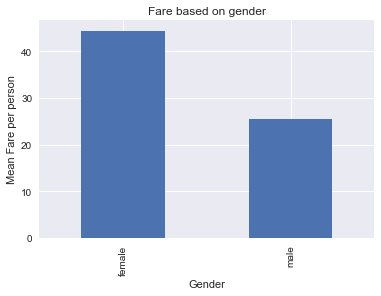

In [37]:
passengers.groupby(['Sex']).mean().Fare.plot(kind='bar')
plt.title("Fare based on gender")
plt.ylabel("Mean Fare per person")
plt.xlabel("Gender")

The mean fare is higher for females than males.

### Fare based on class

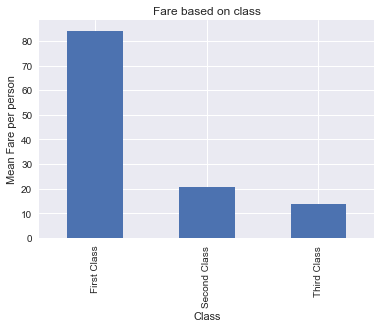

In [38]:
passengers.groupby(['Class']).mean().Fare.plot(kind='bar')
plt.title("Fare based on class")
plt.ylabel("Mean Fare per person")
plt.xlabel("Class")

First class has the highest fares followed by the second class and then the third class.

### Fare based on port of embarkation

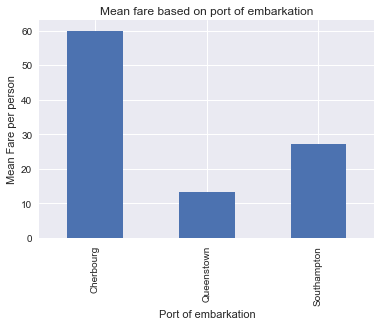

In [131]:
passenger_class_embarked_Fare_clean.groupby(['Ports']).mean().Fare.plot(kind='bar')
plt.title("Mean fare based on port of embarkation")
plt.ylabel("Mean Fare per person")
plt.xlabel("Port of embarkation")

Though Southampton is farther away from the destination than Cherbourg, mean fare collected at Southampton is lower compared to that of Cherbourg.

Let us sum up the fares and check if we get a similar result.

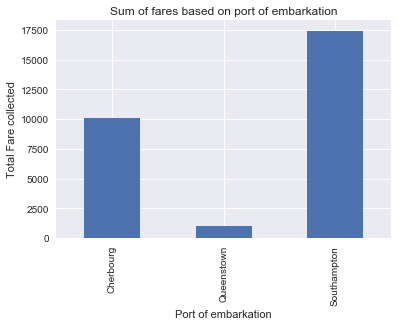

In [129]:
passenger_class_embarked_Fare_clean.groupby(['Ports']).sum().Fare.plot(kind='bar')
plt.title("Sum of fares based on port of embarkation")
plt.ylabel("Total Fare collected")
plt.xlabel("Port of embarkation")

Here, we find that Southampton has a higher sum of fares than Cherbourg port. When I looked at the data, I found that some of the fare values were '0'. I wanted to know if this caused the variation between the sum and mean results. 

In [41]:
#Print entries that have fare value as '0'
passengers.Fare == 0
fare0_df= passengers[passengers.Fare == 0]
print(fare0_df)
len(fare0_df)

     PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0       2              Knight, Mr. Robe

15

We note that all these 0 valued fare entries belong to males and none of them have relatives aboard.

A characteristic of particular interest here is that all entries which have 0 fare are from Southampton port. Let us check if removing these values causes any significant change in the mean graph.

In [42]:
#Create a dataframe without zero fare entries
without_zero_df = passengers[passengers.Fare != 0]
len(without_zero_df)

876

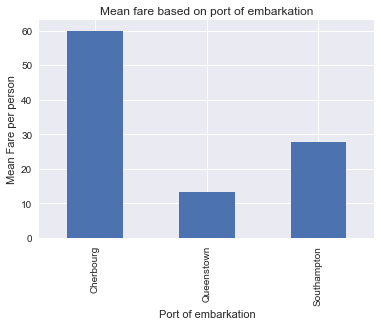

In [132]:
without_zero_df.groupby(['Ports']).mean().Fare.plot(kind='bar')
plt.title("Mean fare based on port of embarkation")
plt.ylabel("Mean Fare per person")
plt.xlabel("Port of embarkation")

But, this does not cause any significant change in the graph. So, I went back to look at the number of people from different classes who boarded at various ports and I found that the number of first class passengers from Cherbourg port is significantly higher than those from Southampton port. This might be causing the mean fare from Cherbourg to be higher than that from Southampton.

### ANALYSIS OF PASSENGERS WITH '0' FARE

I was curious about the people who could travel free of charge and if it was directly linked to the class.

### Class of people with '0' fare

Second Class    40.000000
First Class     33.333333
Third Class     26.666667
Name: Class, dtype: float64


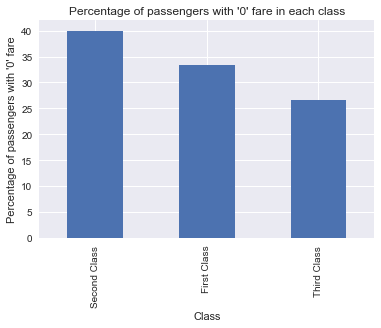

In [169]:
fare0_df_class_percentage = ((fare0_df['Class'].value_counts()/15)*100)
fare0_df_class_percentage.plot(kind='bar')
print (fare0_df_class_percentage)
plt.title("Percentage of passengers with '0' fare in each class")
plt.xlabel("Class")
plt.ylabel("Percentage of passengers with '0' fare")

We observe that maximum number of people who travelled free of charge are from 2nd class and the minimum from 3rd class. About 73% of them are from 1st class or 2nd class.

### Chances of survival of people with '0' fare

Died        93.333333
Survived     6.666667
Name: Survival, dtype: float64


(-1.1041539314426385,
 1.1065695067442638,
 -1.1067593249952199,
 1.1075216272817197)

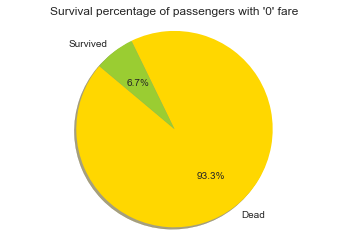

In [47]:
fare0_df_survival_percentage = ((fare0_df['Survival'].value_counts()/15)*100)  
print(fare0_df_survival_percentage)
labels = ['Dead','Survived']
colors = ['gold','yellowgreen']
plt.pie(fare0_df_survival_percentage,labels = labels, colors = colors, 
        autopct='%1.1f%%', shadow='True', startangle = 140)
plt.title("Survival percentage of passengers with '0' fare")
plt.axis('equal')

The chances of survival of people who travelled free of charge is only 6.7% but this could be due to the fact that all the people in this group were males and also that about 67% of them belong to second or third class. We will be discovering in the following graphs that these traits are associated with lower chances of survival.

### SURVIVAL

###  Survival  based on gender

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


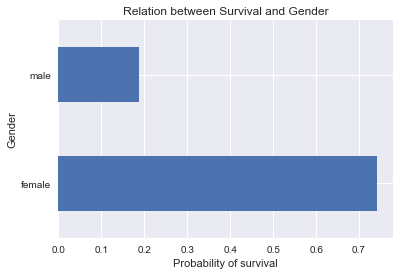

In [48]:
passengers.groupby(['Sex']).mean().Survived.plot(kind='barh')
plt.title("Relation between Survival and Gender")
plt.xlabel("Probability of survival")
plt.ylabel("Gender")
print(passengers.groupby(['Sex']).mean().Survived)

From the above graph it can be observed that the chance of survival of females is more than 3 times that of males. This is because of the 'Woman First' policy.

### Survival based on class

Class
First Class     0.629630
Second Class    0.472826
Third Class     0.242363
Name: Survived, dtype: float64


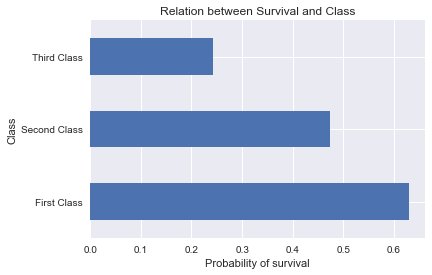

In [49]:
passengers.groupby(['Class']).mean().Survived.plot(kind='barh')
plt.title("Relation between Survival and Class")
plt.xlabel("Probability of survival")
plt.ylabel("Class")
print(passengers.groupby(['Class']).mean().Survived)

Here, we see that people belonging to the first class have the highest rate of survival, followed by the people belonging to the second class and then the third class. So, higher the class greater has been the chance of survival.

### Survival based on gender and class

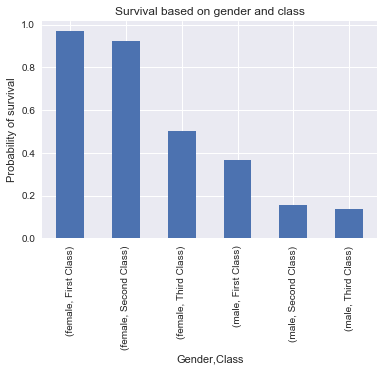

In [50]:
passengers.groupby(['Sex','Class']).mean().Survived.plot(kind='bar')
plt.title("Survival based on gender and class")
plt.xlabel("Gender,Class")
plt.ylabel("Probability of survival")

Irrespective of class, females have higher survival rates than males. In both female and male population, we can see that maximum survivability is in first class followed by second class and then finally the third class.

### Survival based on number of siblings/spouse onboard

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


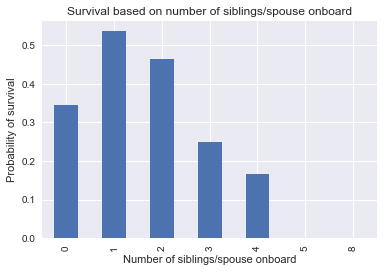

In [51]:
passengers.groupby(['SibSp']).mean().Survived.plot(kind='bar')
plt.title("Survival based on number of siblings/spouse onboard")
plt.xlabel("Number of siblings/spouse onboard")
plt.ylabel("Probability of survival")
print(passengers.groupby(['SibSp']).mean().Survived)

The mean survivability  of people with 1 sibling/spouse is the highest. People with 1 or 2 siblings/spouse have better chances of survival compared to people with no sibling/spouse. But, as the number of sibling/spouse increases beyond 2, the chances of survival decrease drastically.

### Survival based on number of children/parents onboard

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


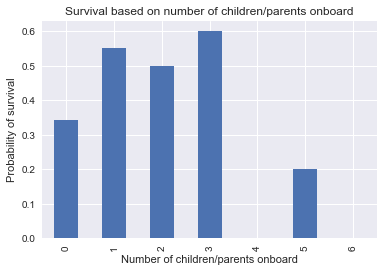

In [134]:
passengers.groupby(['Parch']).mean().Survived.plot(kind='bar')
plt.title("Survival based on number of children/parents onboard")
plt.xlabel("Number of children/parents onboard")
plt.ylabel("Probability of survival")
print(passengers.groupby(['Parch']).mean().Survived)

The chance of survival of people having 1 to 3 children/parents is higher than those without children/parents. People with more than 3 children/parents have lesser chances of survival compared to all others.

### Survival based on number of relatives onboard

Relatives
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


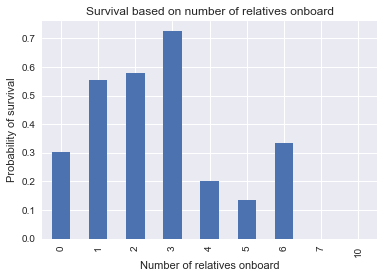

In [53]:
passengers.groupby(['Relatives']).mean().Survived.plot(kind='bar')
plt.title("Survival based on number of relatives onboard")
plt.xlabel("Number of relatives onboard")
plt.ylabel("Probability of survival")
print(passengers.groupby(['Relatives']).mean().Survived)

The chance of survival keeps increasing up to 3 relatives and beyond this point, the chance of survival drops down. It is to be noted that mean survivability is higher for people with 6 relatives compared with people to no relatives aboard.

### AGE

First let us create a database which does not have any missing entries for age. Then we can create 3 categories for age namely Child, Adult and Elderly. Age category is assigned based on the following criteria:

Child: 0<=Age<=18  
Adult: 18<Age<=60  
Elderly: 60<Age<=120  

In [55]:
#Dataframe which doesn't have any missing age entries 
ex_null_age = passengers[passengers['Age'].notnull()].copy()

#Creating 3 categories for age
def cutDF(df):
    return pd.cut(df,[0, 16, 60, 120], labels=['Child','Adult','Elderly'])

ex_null_age['Age_Category'] = ex_null_age[['Age']].apply(cutDF)
ex_null_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survival,Class,Ports,Relatives,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Died,Third Class,Southampton,1,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Survived,First Class,Cherbourg,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Survived,Third Class,Southampton,0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Survived,First Class,Southampton,1,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Died,Third Class,Southampton,0,Adult


In [56]:
#Length of dataframe after removal of missing age entries
len(ex_null_age['Age_Category'])

714

### Percentage of people belonging to different age groups

Adult      82.913165
Child      14.005602
Elderly     3.081232
Name: Age_Category, dtype: float64


(-1.1044549908757766,
 1.1055109124380669,
 -1.1015807354157736,
 1.109787284760914)

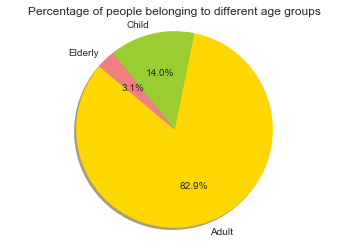

In [137]:
age_percentage = (ex_null_age['Age_Category'].value_counts()/714)*100
print(age_percentage)

colors = ['gold','yellowgreen','lightcoral']
explode = [0,0,0]
labels = ['Adult','Child','Elderly']
plt.pie(age_percentage, labels=labels, explode =  explode, colors = colors, 
        autopct='%1.1f%%', shadow='True', startangle = 140)
plt.title("Percentage of people belonging to different age groups")
plt.axis('equal')

We see that about 83% of the passengers belong to adult category and 14% belong to child category while only around 3% belong to the elderly category.

### Survival among people of different age groups

Age_Category
Adult      0.388514
Child      0.550000
Elderly    0.227273
Name: Survived, dtype: float64

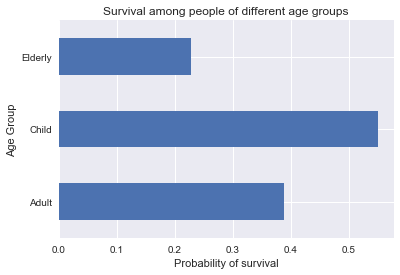

In [59]:
ex_null_age.groupby(['Age_Category']).Survived.mean().plot(kind='barh')
plt.title("Survival among people of different age groups")
plt.xlabel("Probability of survival")
plt.ylabel("Age Group")
ex_null_age.groupby(['Age_Category']).Survived.mean()

We see that children have the highest chance of survival and the elders have the least chance of survival.

### Average age based on gender 

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

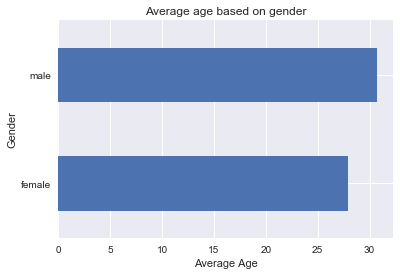

In [139]:
ex_null_age.groupby(['Sex']).Age.mean().plot(kind='barh')
plt.title("Average age based on gender")
plt.xlabel("Average Age")
plt.ylabel("Gender")
ex_null_age.groupby(['Sex']).Age.mean()

The average age of males is 2.8 years higher than the average age of females.

### Average number of relatives who travelled with people of different age groups

Age_Category
Adult      0.665541
Child      2.710000
Elderly    0.409091
Name: Relatives, dtype: float64

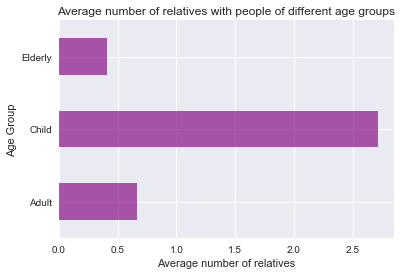

In [183]:
ex_null_age.groupby(['Age_Category']).Relatives.mean().plot(kind='barh',color="purple", alpha=.65)
plt.title("Average number of relatives with people of different age groups")
plt.xlabel("Average number of relatives")
plt.ylabel("Age Group")
ex_null_age.groupby(['Age_Category']).Relatives.mean()

On an average, adults and elderly travel alone while children travel with 2 relatives.

### Average number of siblings/spouse who travelled with people of different age groups

Age_Category
Adult      0.347973
Child      1.570000
Elderly    0.136364
Name: SibSp, dtype: float64

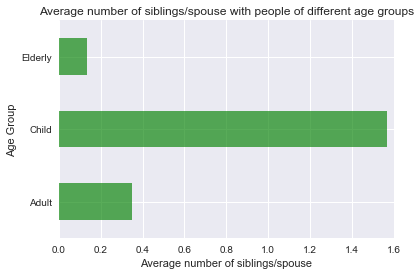

In [182]:
ex_null_age.groupby(['Age_Category']).SibSp.mean().plot(kind='barh',color="green", alpha=.65)
plt.title("Average number of siblings/spouse with people of different age groups")
plt.xlabel("Average number of siblings/spouse")
plt.ylabel("Age Group")
plt.xlim(0,1.6)
ex_null_age.groupby(['Age_Category']).SibSp.mean()

### Average number of parents/children who travelled with people of different age groups

Age_Category
Adult      0.317568
Child      1.140000
Elderly    0.272727
Name: Parch, dtype: float64

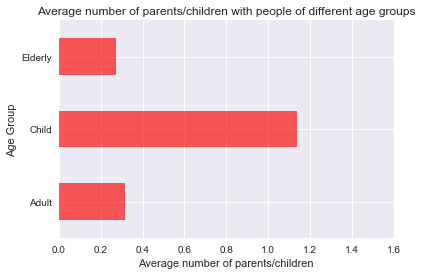

In [181]:
ex_null_age.groupby(['Age_Category']).Parch.mean().plot(kind='barh',color="red", alpha=.65)
plt.title("Average number of parents/children with people of different age groups")
plt.xlabel("Average number of parents/children")
plt.ylabel("Age Group")
plt.xlim(0,1.6)
ex_null_age.groupby(['Age_Category']).Parch.mean()

We note that the average number of parents/children travelling with the elderly is higher than that of siblings/spouse.
The average number of siblings/spouse travelling with the children is higher than that of parents/children.

### Mean fare of people belonging to different age groups

Age_Category
Adult      34.970994
Child      31.588877
Elderly    41.371214
Name: Fare, dtype: float64

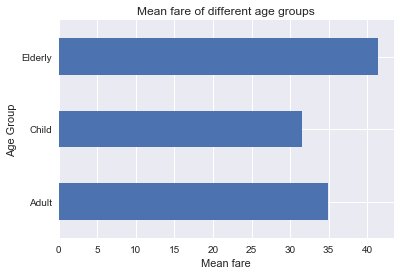

In [174]:
ex_null_age.groupby(['Age_Category']).Fare.mean().plot(kind='barh')
plt.title("Mean fare of different age groups")
plt.xlabel("Mean fare")
plt.ylabel("Age Group")
ex_null_age.groupby(['Age_Category']).Fare.mean()

The mean fare paid by the elderly is higher than that of adults which in turn is higher than that paid for children.

### Average age of people from different classes

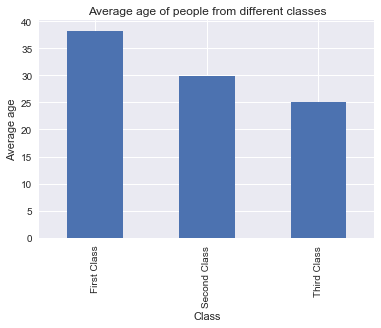

In [65]:
ex_null_age.groupby(['Class']).Age.mean().plot(kind='bar')
plt.title("Average age of people from different classes")
plt.xlabel("Class")
plt.ylabel("Average age")

We observe that the average age of a 1st class passenger is higher than that of 2nd class passenger which in turn is higher than that of 3rd class passenger.

### Number of people of different age groups in different classes

Age_Category  Adult  Child  Elderly
Class                              
First Class     163      9       14
Second Class    149     21        3
Third Class     280     70        5


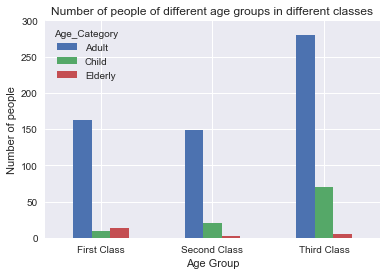

In [185]:
agegroup_class=pd.crosstab(ex_null_age['Class'],ex_null_age['Age_Category'])
ax=agegroup_class.plot.bar()
ax.set(title='Number of people of different age groups in different classes',
       xlabel='Age Group',
       ylabel='Number of people',
       ylim=[0,300])
ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=0);
print(agegroup_class)

In all 3 classes the number of adults is much higher than the number of children and elderly people. In first class, the number of elderly people is slightly higher than the number of children. But in second and third classes the number of children is higher than the number of elderly people.

Among the 3 classes, maximum number of adults are in 3rd class, maximum number of children are also in 3rd class but maximum number of elderly are in 1st class. The number of adults in 1st class is higher than that of 2nd class while the number of children in 1st class is lower than that of 2nd class.
The number of elderly in 3rd class is higher than that of 2nd class.

### Average fare based on age group and class

Age_Category  Class       
Adult         First Class      88.963881
              Second Class     20.861913
              Third Class      11.047468
Child         First Class     113.352778
              Second Class     27.364486
              Third Class      22.343693
Elderly       First Class      59.969050
              Second Class     10.500000
              Third Class       7.820000
Name: Fare, dtype: float64

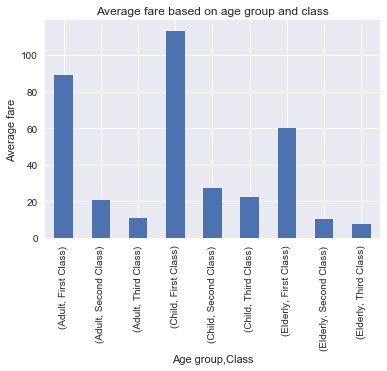

In [67]:
ex_null_age.groupby(['Age_Category','Class']).Fare.mean().plot(kind='bar')
plt.title("Average fare based on age group and class")
plt.xlabel("Age group,Class")
plt.ylabel("Average fare")
ex_null_age.groupby(['Age_Category','Class']).Fare.mean()

In all 3 age groups, mean fare of 1st class is higher than that of 2nd class which in turn is higher than that of 3rd class. In all 3 classes, the mean fare of children is maximum and that of elderly is minimum.

## Summary

Only 38% of the people aboard the titanic survived. More number of males travelled in the ship compared to females. Most passengers in the ship were from third class. The difference between the percentage of males and females is much higher in 3rd class compared to the other 2 classes. About 60% of the people travelled alone. The percentage of passengers who travelled with siblings/spouse is higher than those who travelled with parents/children. In third class, the percentage of people travelling alone is much higher than that of first and second class. Most of the passengers have boarded at the Southampton port, some of them at Cherbourg port and few of them from Queenstown. The Southampton port is the most popular port among all 3 classes. Cherbourg port is most popular among first class and least popular among third class passengers. Queenstown port seems to be popular only among 3rd class passengers. The mean fare is higher for females. First class has the highest fare and third class has the lowest fare. All the people who did not pay any fare were males, travelled alone and were from Southampton port. The maximum number of people who travelled free of charge are from 2nd class and the minimum from 3rd class. About 73% of them are from 1st class or 2nd class. 


The chance of survival of females is significantly higher than that of males. This might be because of the 'woman and children first' policy. Higher the class, greater has been the chance of survival. People with 1 or 2 siblings/spouse have better chances of survival compared to people with no sibling/spouse. The chance of survival of people having 1 to 3 children/parents is higher than those without children/parents. About 83% of the passengers belong to adult category and 14% belong to child category while only about 3% belong to the elderly category. Children had maximum chance of survival while the elderly had the least chance of survival. The average age of males is slightly higher than that of females. The average number of children/parents travelling with the elderly is higher than that of siblings/spouse while in the case of children, the average number of siblings/spouse is higher. The mean fare is maximum for elderly and minimum for children. The average age is highest for first class and lowest for third class passengers. In all 3 classes the number of adults is much higher than the number of children and elderly people. In all 3 classes, the mean fare of children is highest and that of elderly is lowest.

## Limitations

• All calculations involving age as a parameter exclude entries missing the 'Age' value.

• All calculations involving port of embarkation as a parameter exclude entries missing the 'Embarked' value.

• Due to the inconsistent nature of the ticket column and huge amount of missing data in cabin column, both have been excluded from the analysis.

## References

www.kaggle.com

www.stackoverflow.com